Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [16]:

# Load the dataset from the 'data' folder
df = pd.read_csv('DataSet/sentimentdataset.csv')  

# Display the first 5 rows of the dataset to check its structure
print(df.head())  


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [ ]:
Data Cleaning

In [3]:
# cleaning the required things in dataset
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace=True, errors='ignore')

In [4]:
print(df.isnull().sum())
df.dropna(inplace=True) 

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64


In [5]:
#Convert Timestamp to DateTime Format(Data cleaning)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Hour"] = df["Timestamp"].dt.hour

In [6]:
#Basic Statistics of Engagement Metrics
print(df[["Likes", "Retweets"]].describe())

            Likes    Retweets
count  732.000000  732.000000
mean    42.901639   21.508197
std     14.089848    7.061286
min     10.000000    5.000000
25%     34.750000   17.750000
50%     43.000000   22.000000
75%     50.000000   25.000000
max     80.000000   40.000000


In [7]:
#Most Engaging Posts (Top Liked & Retweeted)
top_liked = df.nlargest(10, "Likes")[["Text", "Likes"]]
top_retweeted = df.nlargest(10, "Retweets")[["Text", "Retweets"]]
print(top_liked)
print(top_retweeted)

                                                  Text  Likes
335  Thrilled to witness the grandeur of a cultural...   80.0
345  Motivated to achieve fitness goals after an in...   80.0
355  Anticipation for an upcoming adventure in an e...   80.0
368  Elation over discovering a rare book in a quai...   80.0
382  A sense of wonder at the vastness of the cosmo...   80.0
402  Awe-inspired by the vastness of the cosmos on ...   80.0
432  Heartache deepens, a solitary journey through ...   80.0
470  Dancing on sunshine, each step a celebration o...   80.0
481  Surrounded by the colors of joy, a canvas pain...   80.0
510  At the front row of Adele's concert, each note...   80.0
                                                  Text  Retweets
335  Thrilled to witness the grandeur of a cultural...      40.0
345  Motivated to achieve fitness goals after an in...      40.0
355  Anticipation for an upcoming adventure in an e...      40.0
368  Elation over discovering a rare book in a quai...    

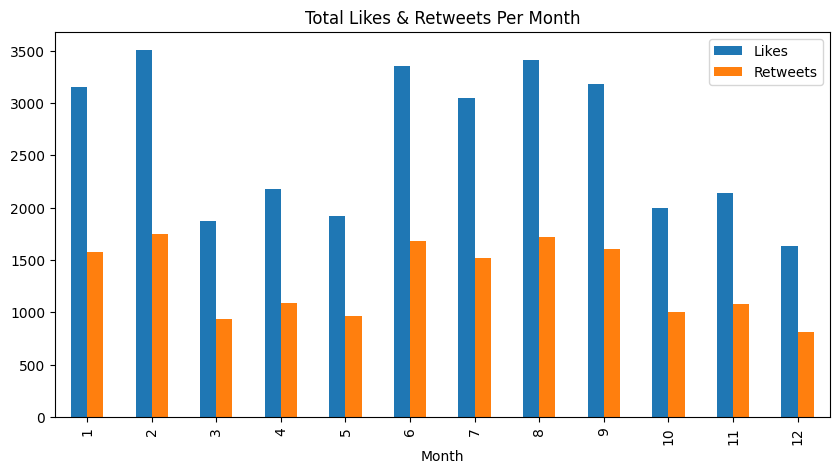

In [8]:
#Engagement Trend Over Time
df.groupby("Month")[["Likes", "Retweets"]].sum().plot(kind='bar', figsize=(10,5))
plt.title("Total Likes & Retweets Per Month")
plt.show()

In [9]:
#Find Users with the Highest Engagement
user_engagement = df.groupby("User")[["Likes", "Retweets"]].sum()
top_users = user_engagement.sort_values(by="Likes", ascending=False).head(10)
print(top_users)

                   Likes  Retweets
User                              
WinterWarmth       170.0      85.0
CosmosExplorer     160.0      80.0
CarnivalDreamer    144.0      72.0
CulinaryExplorer   140.0      70.0
MusicHarmonist     140.0      70.0
PeakConqueror      138.0      69.0
EchoedLaughter     130.0      65.0
RainNurturer       126.0      63.0
GrowthSeeker       120.0      60.0
DanceEnthusiast    110.0      56.0


In [10]:
#Identify Popular Content Themes (Based on Hashtags)
from collections import Counter

all_hashtags = " ".join(df["Hashtags"]).split()
common_hashtags = Counter(all_hashtags).most_common(10)
print(common_hashtags)

[('#Serenity', 15), ('#Gratitude', 13), ('#Excitement', 13), ('#Despair', 11), ('#Nostalgia', 11), ('#Contentment', 10), ('#Curiosity', 10), ('#Awe', 9), ('#Grief', 9), ('#Loneliness', 9)]


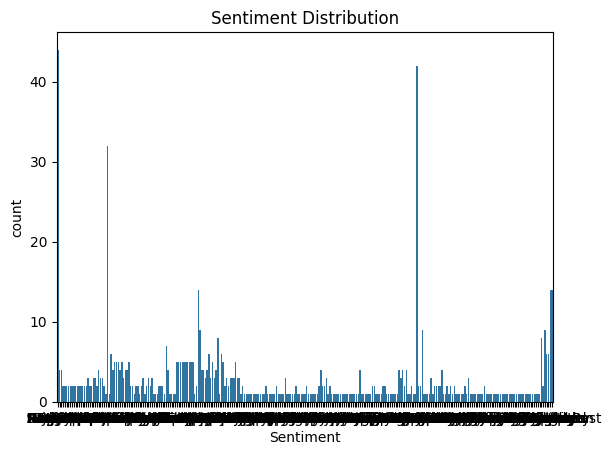

In [11]:
#Sentiment analysis 
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

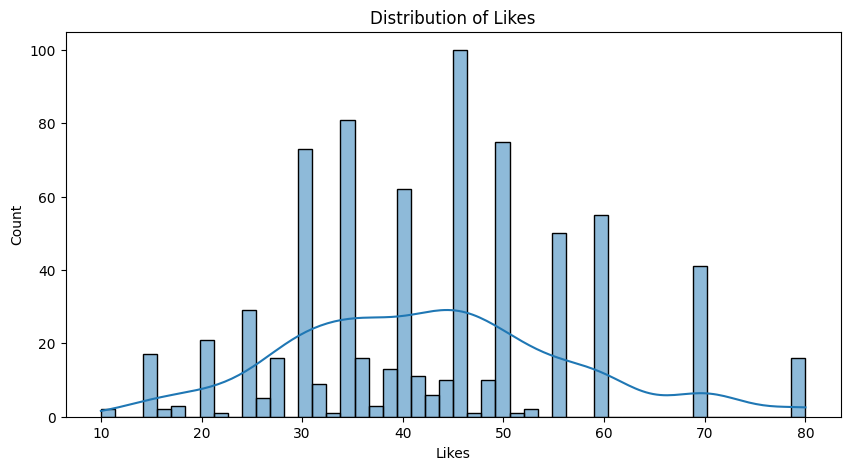

In [12]:
#User Engagement Distribution visualization using histogram
plt.figure(figsize=(10,5))
sns.histplot(df["Likes"], bins=50, kde=True)
plt.title("Distribution of Likes")
plt.show()

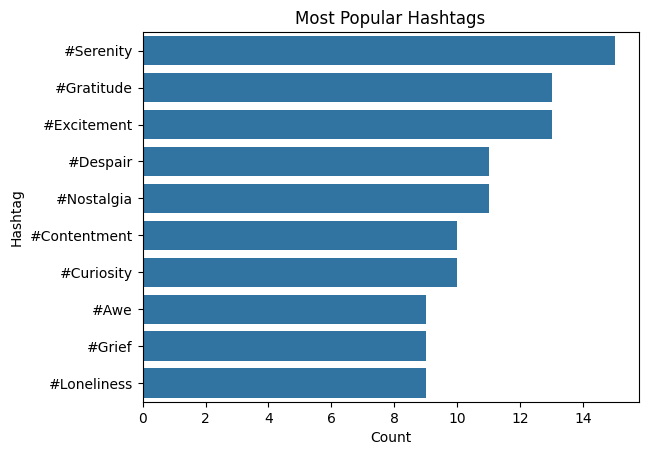

In [13]:
#Horizontal visualization of Most Used Hashtags using barplot
hashtags_df = pd.DataFrame(common_hashtags, columns=["Hashtag", "Count"])
sns.barplot(x="Count", y="Hashtag", data=hashtags_df)
plt.title("Most Popular Hashtags")
plt.show()

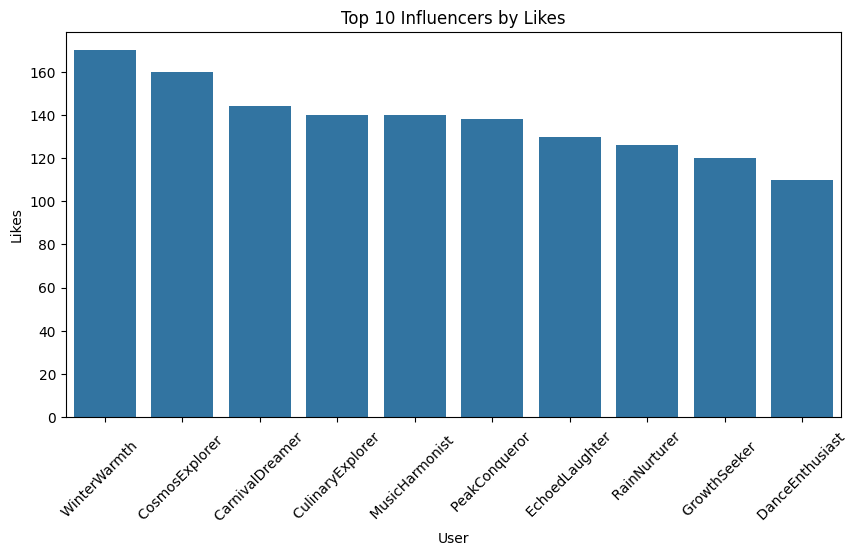

In [18]:
#Top 10 influencers by likes visualization
plt.figure(figsize=(10,5))
sns.barplot(x=top_users.index, y=top_users["Likes"])
plt.xticks(rotation=45)
plt.title("Top 10 Influencers by Likes")
plt.show()

Pie chart visualization for social media usage by hour

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19996\890021676.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')


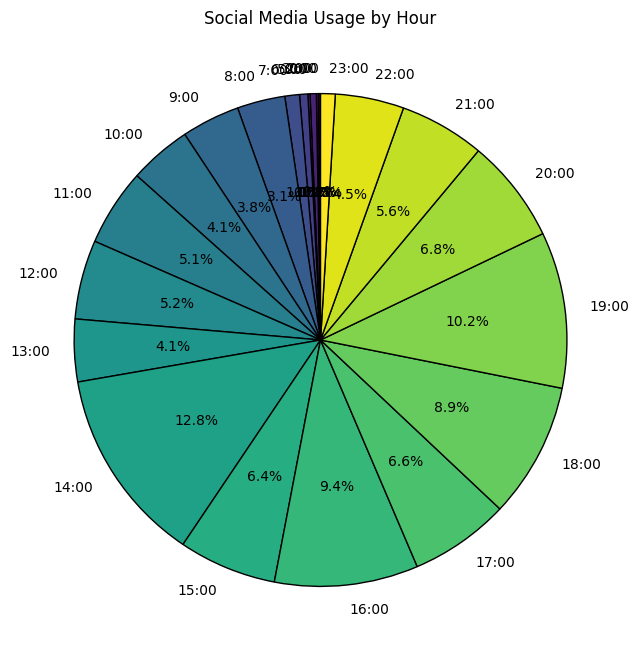

In [9]:

# Load the dataset
df = pd.read_csv('DataSet/sentimentdataset.csv')  # Adjust path if necessary

# Ensure the 'Hour' column exists
if 'Hour' not in df.columns:
    df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour

# Count occurrences of each hour to get the hourly distribution
hourly_distribution = df['Hour'].value_counts().sort_index()

# Define labels and values for the pie chart
labels = [f"{hour}:00" for hour in hourly_distribution.index]
values = hourly_distribution.values

# Generate colors using the 'viridis' colormap
colormap = cm.get_cmap('viridis')
colors = colormap(np.linspace(0, 1, len(values)))

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title of the pie chart
plt.title("Social Media Usage by Hour")

# Display the chart
plt.show()
